In [6]:
! pip install turicreate
! pip install afinn
! pip install textblob

     |████████████████████████████████| 92.0MB 58kB/s 
     |████████████████████████████████| 327kB 40.8MB/s 
     |████████████████████████████████| 86.4MB 49kB/s 
     |████████████████████████████████| 3.4MB 47.2MB/s 
     |████████████████████████████████| 450kB 42.0MB/s 
     |████████████████████████████████| 3.8MB 44.0MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320848 sha256=3841c89881726b8710ee258de179b95fc646b5287eac8addb8edff96cdd117dd
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for prettytable: filename=prettytable-0.7.2-cp36-none-any.whl size=13700 sha256=f10c4efc3705a21ae64bdc6d4419d42dde04dfb82ba3058da26fbd093e01c025
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=a3

In [11]:
import turicreate as tc
import seaborn as sns
from afinn import Afinn
from textblob import TextBlob
import matplotlib.pyplot as plt
import gensim


In [4]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [3]:
DATASET_NAME = 'amffr'
KAGGLE_REPO = 'snap/amazon-fine-food-reviews'
!rm -r ./datasets/$DATASET_NAME/
!mkdir -p ./datasets/$DATASET_NAME/data
!mkdir -p ./datasets/$DATASET_NAME/zip
!mkdir -p ./datasets/$DATASET_NAME/sql
!ls datasets/$DATASET_NAME/data

!kaggle datasets list -s $DATASET_NAME
# download the dataset from Kaggle and unzip it
!kaggle datasets download $KAGGLE_REPO -p ./datasets/$DATASET_NAME/zip
!unzip ./datasets/$DATASET_NAME/zip/*.zip -d ./datasets/$DATASET_NAME/data

No datasets found
 96% 233M/242M [00:02<00:00, 66.1MB/s]
100% 242M/242M [00:02<00:00, 86.9MB/s]
Archive:  ./datasets/amffr/zip/amazon-fine-food-reviews.zip
  inflating: ./datasets/amffr/data/Reviews.csv  
  inflating: ./datasets/amffr/data/database.sqlite  
  inflating: ./datasets/amffr/data/hashes.txt  


# Homework Assignment  6

**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review. 
Evaluate the classifier using the rest of the data (30pt). 


In [10]:
DATA_PATH = f'./datasets/{DATASET_NAME}/data/Reviews.csv'
sf = tc.SFrame.read_csv(DATA_PATH)
sf.head()

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

3 lines failed to parse correctly

Finished parsing file /content/datasets/amffr/data/Reviews.csv

Parsing completed. Parsed 100 lines in 1.11325 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Read 71440 lines. Lines per second: 51432.1

Unexpected characters after last column. "0"
Parse failed at token ending at: 
	 />\"
190510,B0012UEHFQ,A2788LGTSGCFA6,"Mom of 3 ""sue""",0,^0,5,1329436800,She Loves Them!,I have a crazy do
Successfully parsed 10 tokens: 
	0: 190509
	1: B0012UEHFQ
	2: A3CR0UBHFX0NE7
	3: Sharee Lee Peterson
	4: 0
	5: 0
	6: 1
	7: 1330300800
	8: Poor Substitute
	9: I had prev ... of 3 "sue"

Unexpected characters after last column. "B000GW46DE"
Parse failed at token ending at: 
	yself that tastes much better than this."
201283,B000GW46DE,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 201282
	1: B000GW46DE
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
201283

Unexpected characters after last column. "B000PMC7GI"
Parse failed at token ending at: 
	yself that tastes much better than this."
353089,B000PMC7GI,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 353088
	1: B000PMC7GI
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
353089

Unexpected characters after last column. "give it a try.  After drinking half of a bottle"
Parse failed at token ending at: 
	ou haven't, give it a try.  After drinking half of a bottle,^ you will know it's good stuff."
434576,B001SB1B
Successfully parsed 10 tokens: 
	0: 434574
	1: B002DHMX3A
	2: A2XNJJ9TF70P4J
	3: Angie
	4: 1
	5: 1
	6: 1
	7: 1307232000
	8: How did th ... s this up?
	9: "The cerea ... ou haven't

8 lines failed to parse correctly

Finished parsing file /content/datasets/amffr/data/Reviews.csv

Parsing completed. Parsed 260995 lines in 3.58937 secs.

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


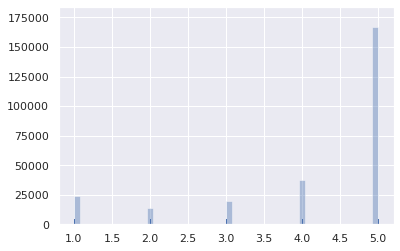

In [14]:
# Check the class distribution
sns.set()
sns.distplot(sf['Score'], kde=False, rug=True)

In [36]:
sf = sf[sf['Score'] != 3]
def label2sentiment(label):
    if label >= 4:
        return "Positive"
    else:
        return "Negative"
# Create the sentiment (same as lecture: 4,5 positive, 1,2 negative - ignore 3)
sf['sentiment'] = sf['Score'].apply(lambda label: label2sentiment(label))

# Let's create 3 features: 1 gram, 2 gram of the text, and TF-IDF of the summary
sf['words_1grams'] = tc.text_analytics.count_ngrams(sf['Text'], n=1, method='word')
sf['words_2grams'] = tc.text_analytics.count_ngrams(sf['Text'], n=2, method='word')
sf['Summary TF-IDF'] = tc.text_analytics.tf_idf(sf['Summary'])

# Split to the train-test (80,20)
train, test = sf.random_split(0.8)
cls = tc.classifier.create(train,features=['words_1grams', 'words_2grams', 'Summary TF-IDF'], target="sentiment")

# Evaluate result
v1 = cls.evaluate(test)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 183392

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 1564919

Number of coefficients      : 1564920

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.080196  | 7.316626     | 0.846858          | 0.848752            |

| 1         | 9        | 1.684115  | 13.708738    | 0.927489          | 0.881798            |

| 2         | 10       | 1.684115  | 15.983123    | 0.996401          | 0.951000            |

| 3         | 11       | 1.684115  | 18.312464    | 0.998337          | 0.952036            |

| 4         | 13       | 1.684115  | 22.105559    | 0.999406          | 0.953175            |

| 6         | 15       | 1.684115  | 26.736065    | 0.999880          | 0.955869            |

| 7         | 16       | 1.684115  | 29.074665    | 0.999929          | 0.956697            |

| 8         | 17       | 1.684115  | 31.409428    | 0.999956          | 0.957837            |

| 9         | 20       | 1.156456  | 36.493407    | 0.999956          | 0.957837            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 183392

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 1564919

Number of coefficients    : 1564920

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.082144  | 6.245932     | 0.846858          | 0.848752            |

| 1         | 11       | 4.353643  | 14.394772    | 0.993189          | 0.951207            |

| 2         | 16       | 3.793583  | 21.323374    | 0.998926          | 0.956801            |

| 3         | 17       | 3.793583  | 23.429877    | 0.999684          | 0.952346            |

| 4         | 19       | 1.387676  | 26.734597    | 0.999766          | 0.955351            |

| 6         | 21       | 1.387676  | 30.983861    | 0.999913          | 0.956387            |

| 7         | 23       | 0.862508  | 34.316892    | 0.999918          | 0.956283            |

| 8         | 24       | 1.000000  | 36.479940    | 0.999924          | 0.956283            |

| 9         | 28       | 1.120458  | 42.324182    | 0.999956          | 0.956490            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.9578369418833523
PROGRESS: SVMClassifier                   : 0.9564902102973168
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [25]:
print("-"*10 + " Best model: LogisticClassifier, with F1-score of 0.9766, AUC of 0.973 " + "-"*10)

---------- Best model: LogisticClassifier, with F1-score of 0.9766, AUC of 0.973 ----------


**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

In [26]:
afinn = Afinn()
train['Text Afinn'] = train['Text'].apply(lambda t: afinn.score(t))
train['Summary Afinn'] = train['Summary'].apply(lambda t: afinn.score(t))
test['Text Afinn'] = test['Text'].apply(lambda t: afinn.score(t))
test['Summary Afinn'] = test['Summary'].apply(lambda t: afinn.score(t))

train['Summary TextBlob Polarity'] = train['Summary'].apply(lambda review: TextBlob(review).sentiment.polarity)
train['Summary TextBlob Subjectivity'] = train['Summary'].apply(lambda review: TextBlob(review).sentiment.polarity)
test['Summary TextBlob Polarity'] = test['Summary'].apply(lambda review: TextBlob(review).sentiment.polarity)
test['Summary TextBlob Subjectivity'] = test['Summary'].apply(lambda review: TextBlob(review).sentiment.polarity)

In [27]:
# Train same process, different features
cls = tc.classifier.create(train,features=['Text Afinn', 'Summary Afinn', 'Summary TextBlob Polarity', 'Summary TextBlob Subjectivity'], target="sentiment")

# Evaluate result
cls.evaluate(test)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 183673

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.116432     | 0.892722          | 0.893463            | 0.520298          | 0.519791            |

| 2         | 0.225901     | 0.893904          | 0.894187            | 0.426287          | 0.425324            |

| 3         | 0.337482     | 0.893898          | 0.893566            | 0.369710          | 0.368487            |

| 4         | 0.450511     | 0.893991          | 0.893773            | 0.333695          | 0.332271            |

| 5         | 0.572545     | 0.893653          | 0.893566            | 0.310280          | 0.308486            |

| 10        | 1.141276     | 0.894361          | 0.893877            | 0.269977          | 0.266940            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 183673

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.109047     | 0.878409          | 0.884568            | 0.345014          | 0.337763            |

| 2         | 0.209555     | 0.886385          | 0.889946            | 0.324924          | 0.320415            |

| 3         | 0.308277     | 0.892145          | 0.893980            | 0.321669          | 0.318918            |

| 4         | 0.410036     | 0.892815          | 0.894601            | 0.319789          | 0.317048            |

| 5         | 0.514252     | 0.892679          | 0.894290            | 0.318911          | 0.316233            |

| 10        | 1.000613     | 0.892673          | 0.893670            | 0.317723          | 0.315673            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 183673

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.111355     | 0.892722          | 0.893463            | 0.317280          | 0.315407            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 183673

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

Number of coefficients    : 5

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.112566     | 0.877930          | 0.882499            |

| 1         | 4        | 1.000000  | 0.228149     | 0.876389          | 0.881775            |

| 2         | 6        | 1.000000  | 0.344585     | 0.873335          | 0.879499            |

| 3         | 7        | 1.000000  | 0.422998     | 0.873585          | 0.879603            |

| 4         | 9        | 1.000000  | 0.544504     | 0.875959          | 0.881671            |

| 9         | 15       | 1.000000  | 0.970958     | 0.877287          | 0.883326            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 183673

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

Number of coefficients      : 5

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.264343     | 0.869779          | 0.875259            |

| 2         | 3        | 0.431362     | 0.881300          | 0.886533            |

| 3         | 4        | 0.597593     | 0.886086          | 0.889739            |

| 4         | 5        | 0.763856     | 0.886467          | 0.889946            |

| 5         | 6        | 0.930363     | 0.886625          | 0.889739            |

| 6         | 7        | 1.098622     | 0.886619          | 0.889739            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.8938767066611502
PROGRESS: RandomForestClassifier          : 0.8936698386429458
PROGRESS: DecisionTreeClassifier          : 0.8934629706247414
PROGRESS: SVMClassifier                   : 0.8833264377327266
PROGRESS: LogisticClassifier              : 0.8897393462970625
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


{'accuracy': 0.895907843300341,
 'auc': 0.8941385565797216,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Negative   |     Positive    |  3746 |
 |   Negative   |     Negative    |  3554 |
 |   Positive   |     Negative    |  1260 |
 |   Positive   |     Positive    | 39532 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9404543832520519,
 'log_loss': 0.26841073967692297,
 'precision': 0.913443319931605,
 'recall': 0.9691115905079427,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+-------+------+
 | threshold | fpr | tpr |   p   |  n   |
 +-----------+-----+-----+-------+------+
 |    0.0    | 1.0 | 1.0 | 40792 | 7300 |
 |   0.001   | 1.0 | 1.0 | 40792 | 7300 |
 |   0.002   | 1.

In [29]:
print("-"*10 + " Best model: BoostedTreesClassifier , with F1-score of 0.9404, AUC of 0.894 " + "-"*10)

---------- Best model: BoostedTreesClassifier , with F1-score of 0.9404, AUC of 0.894 ----------


In [39]:
ignore = ["confusion_matrix", "roc_curve"]
v1_scores, v2_scores, keys = [], [], []
for (key1, val1), (key2, val2)  in zip(v1.items(), v2.items()):
  if key1 not in ignore:
    v1_scores.append(val1)
    v2_scores.append(val2)
    keys.append(key1)
v1_scores, v2_scores, keys

([0.9601760767132347,
  0.9749285021411384,
  0.9767290204934366,
  0.12953124456897658,
  0.9656160458452722,
  0.988100764776309],
 [0.895907843300341,
  0.8941385565797216,
  0.9404543832520519,
  0.26841073967692297,
  0.913443319931605,
  0.9691115905079427],
 ['accuracy', 'auc', 'f1_score', 'log_loss', 'precision', 'recall'])

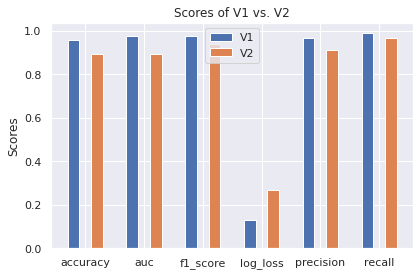

In [49]:
labels = keys

width = 0.2  # the width of the bars
x_v1 = [i - width for i in range(len(labels))]
x_v2 = [i + width for i in range(len(labels))]
fig, ax = plt.subplots()
rects1 = ax.bar(x_v1, v1_scores, width, label='V1')
rects2 = ax.bar(x_v2, v2_scores, width, label='V2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores of V1 vs. V2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

In [14]:
!mkdir ./datasets/hotels

# download the dataset from Kaggle and unzip it
!kaggle datasets download datafiniti/hotel-reviews -p ./datasets/hotels
!unzip ./datasets/hotels/*.zip  -d ./datasets/hotels
! ls -l ./datasets/hotels

 38% 5.00M/13.1M [00:01<00:02, 3.92MB/s]
100% 13.1M/13.1M [00:01<00:00, 9.67MB/s]
Archive:  ./datasets/hotels/hotel-reviews.zip
  inflating: ./datasets/hotels/7282_1.csv  
  inflating: ./datasets/hotels/Datafiniti_Hotel_Reviews.csv  
  inflating: ./datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv  
total 199488
-rw-r--r-- 1 root root  16548391 Sep 20  2019 7282_1.csv
-rw-r--r-- 1 root root  49564735 Sep 20  2019 Datafiniti_Hotel_Reviews.csv
-rw-r--r-- 1 root root 124452060 Sep 20  2019 Datafiniti_Hotel_Reviews_Jun19.csv
-rw-r--r-- 1 root root  13705194 Nov 26 15:28 hotel-reviews.zip


In [17]:
sf = tc.SFrame.read_csv('./datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv')
sf = sf[sf['reviews.rating'] != 3]
def label2sentiment(label):
    if label >= 4:
        return "Positive"
    else:
        return "Negative"
# Create the sentiment (same as lecture: 4,5 positive, 1,2 negative - ignore 3)
sf['sentiment'] = sf['reviews.rating'].apply(lambda label: label2sentiment(label))
sf = sf[['reviews.text', 'sentiment']]
sf.head()

Finished parsing file /content/datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv

Parsing completed. Parsed 100 lines in 1.17909 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,float,float,str,int,str,str,str,str,int,str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 4219 lines. Lines per second: 2856.14

Finished parsing file /content/datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv

Parsing completed. Parsed 10000 lines in 1.8008 secs.

reviews.text,sentiment
We stayed in the kingsuite with the separa ...,Positive
Not cheap but excellentlocation. Price is ...,Positive
If you get the room thatthey advertised on the ...,Negative
"This is such a fun,lovely hotel. The ...",Positive
We recently stayed atthis hotel on a trip to ...,Negative
"I reserved a room a weekin advance, knowing a ...",Negative
MoreMore,Positive
"Hello, I have traveled alot and abroad and by ...",Negative
This is a new Hampton Innand is well decorated. ...,Positive
Completely accommodatinghotel! I booked a ...,Positive


In [12]:
!mkdir models
!wget -O ./models/GoogleNews-vectors-negative300.bin.gz https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
!gunzip ./models/GoogleNews-vectors-negative300.bin.gz
model = gensim.models.KeyedVectors.load_word2vec_format('./models/GoogleNews-vectors-negative300.bin', binary=True)  


--2020-11-26 15:18:19--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.41.110
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.41.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘./models/GoogleNews-vectors-negative300.bin.gz’

./models/GoogleNews 100%[===================>]   1.53G  34.9MB/s    in 46s     

2020-11-26 15:19:06 (34.2 MB/s) - ‘./models/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [13]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
nltk.download('punkt')

def txt2vector(txt):
    words = word_tokenize(txt)
    words = [w for w in words if w in model]
    if len(words) != 0:
        return np.mean([model[w] for w in words], axis=0)
    return None

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
from tqdm import tqdm
l = []
for i in tqdm(range(len(sf))):
    text = sf[i]["reviews.text"]
    l.append(txt2vector(text))
sf['word2vec'] = l 
sf.head()

100%|██████████| 8810/8810 [00:14<00:00, 612.30it/s]


reviews.text,sentiment,word2vec
We stayed in the kingsuite with the separa ...,Positive,[ 1.18850181e-024.47982252e-02 ...
Not cheap but excellentlocation. Price is ...,Positive,[-0.00103251 0.042968410.02528483 0.05969781 ...
If you get the room thatthey advertised on the ...,Negative,[ 4.30379808e-022.63671875e-02 ...
"This is such a fun,lovely hotel. The ...",Positive,[ 0.01377063 0.035875270.02521246 0.07054138 ...
We recently stayed atthis hotel on a trip to ...,Negative,[ 0.00730187 0.027203480.02891594 0.09624441 ...
"I reserved a room a weekin advance, knowing a ...",Negative,[ 0.0357173 0.008146630.00174102 0.0650087 ...
MoreMore,Positive,None
"Hello, I have traveled alot and abroad and by ...",Negative,[ 0.01311493 0.035014560.05763953 0.10833631 ...
This is a new Hampton Innand is well decorated. ...,Positive,[ 4.90495283e-036.20408915e-02 ...
Completely accommodatinghotel! I booked a ...,Positive,[ 1.03881834e-025.72466180e-02 ...


In [20]:
sf = sf.dropna()
train, test = sf.random_split(0.8)
cls3 = tc.classifier.create(train,features=['word2vec'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 6661

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

Number of coefficients      : 301

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 3.014478     | 0.948506          | 0.931624            |

| 2         | 3        | 4.237596     | 0.959616          | 0.957265            |

| 3         | 4        | 5.464517     | 0.965771          | 0.957265            |

| 4         | 5        | 6.630268     | 0.970275          | 0.951567            |

| 5         | 6        | 7.709548     | 0.972226          | 0.951567            |

| 8         | 9        | 11.317139    | 0.971776          | 0.945869            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

SVM:

--------------------------------------------------------

Number of examples          : 6661

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

Number of coefficients    : 301

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.074617  | 0.401446     | 0.874794          | 0.874644            |

| 1         | 13       | 5.605264  | 1.146589     | 0.874794          | 0.874644            |

| 2         | 14       | 5.605264  | 1.318679     | 0.125357          | 0.125356            |

| 3         | 22       | 4.174112  | 2.093550     | 0.887404          | 0.883191            |

| 4         | 23       | 4.174112  | 2.266339     | 0.945053          | 0.931624            |

| 9         | 35       | 3.095456  | 3.687859     | 0.959466          | 0.948718            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.9458689458689459
PROGRESS: SVMClassifier                   : 0.9487179487179487
PROGRESS: ---------------------------------------------
PROGRESS: Selecting SVMClassifier based on validation set performance.


In [21]:
cls3.evaluate(test)

{'accuracy': 0.9507278835386338, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Positive   |     Negative    |   29  |
 |   Negative   |     Negative    |  180  |
 |   Negative   |     Positive    |   59  |
 |   Positive   |     Positive    |  1518 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns], 'f1_score': 0.9718309859154929, 'precision': 0.9625871908687381, 'recall': 0.9812540400775694}

## Improve!

In [22]:
sf['words_1grams'] = tc.text_analytics.count_ngrams(sf['reviews.text'], n=1, method='word')
sf['words_2grams'] = tc.text_analytics.count_ngrams(sf['reviews.text'], n=2, method='word')
sf.head()

reviews.text,sentiment,word2vec,words_1grams
We stayed in the kingsuite with the separa ...,Positive,[ 1.18850181e-024.47982252e-02 ...,"{'want': 1, 'and': 2,'wasn': 1, 'more': 1, ..."
Not cheap but excellentlocation. Price is ...,Positive,[-0.00103251 0.042968410.02528483 0.05969781 ...,"{'have': 1, 'c': 1, 'no':1, 'carmel': 1, 'fan' ..."
If you get the room thatthey advertised on the ...,Negative,[ 4.30379808e-022.63671875e-02 ...,"{'one': 1, 'probably': 1,'smelly': 1, 'noisy': 1, ..."
"This is such a fun,lovely hotel. The ...",Positive,[ 0.01377063 0.035875270.02521246 0.07054138 ...,"{'more': 1, 'of': 1,'each': 1, 'but': 1, ..."
We recently stayed atthis hotel on a trip to ...,Negative,[ 0.00730187 0.027203480.02891594 0.09624441 ...,"{'about': 1, 'in': 1,'shared': 1, 'this': 1, ..."
"I reserved a room a weekin advance, knowing a ...",Negative,[ 0.0357173 0.008146630.00174102 0.0650087 ...,"{'she': 1,'confirmation': 1, 'as': ..."
"Hello, I have traveled alot and abroad and by ...",Negative,[ 0.01311493 0.035014560.05763953 0.10833631 ...,"{'stayed': 1, 'only': 1,'not': 1, 'you': 1, ..."
This is a new Hampton Innand is well decorated. ...,Positive,[ 4.90495283e-036.20408915e-02 ...,"{'more': 1, 'was': 1,'sign': 1, 'friendly' ..."
Completely accommodatinghotel! I booked a ...,Positive,[ 1.03881834e-025.72466180e-02 ...,"{'under': 1,'construction': 1, ..."
Great staff and rooms.Housekeeping was always ...,Positive,[-1.90621836e-034.07961756e-02 ...,"{'orleans': 1, 'new': 1,'visiting': 1, 'perfe ..."


In [24]:
sf = sf.dropna()
train, test = sf.random_split(0.8)
cls4 = tc.classifier.create(train,features=['word2vec', 'words_1grams', 'words_2grams'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 6666

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 205845

Number of coefficients      : 205846

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 6        | 0.025805  | 0.981244     | 0.873537          | 0.863248            |

| 1         | 11       | 2.193459  | 1.737665     | 0.945245          | 0.877493            |

| 2         | 12       | 2.193459  | 1.925941     | 0.996250          | 0.914530            |

| 3         | 13       | 2.193459  | 2.155409     | 0.999850          | 0.931624            |

| 4         | 14       | 2.193459  | 2.420564     | 0.999700          | 0.934473            |

| 9         | 23       | 0.503485  | 4.325504     | 1.000000          | 0.940171            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 6666

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 205845

Number of coefficients    : 205846

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 6        | 0.026467  | 0.790729     | 0.873537          | 0.863248            |

| 1         | 11       | 2.249724  | 1.531796     | 0.929343          | 0.868946            |

| 2         | 12       | 2.249724  | 1.766739     | 0.494299          | 0.339031            |

| 3         | 14       | 0.693379  | 2.094972     | 0.998650          | 0.943020            |

| 4         | 15       | 0.866723  | 2.289945     | 0.999550          | 0.943020            |

| 9         | 23       | 0.250000  | 3.733460     | 1.000000          | 0.943020            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.9401709401709402
PROGRESS: SVMClassifier                   : 0.9430199430199431
PROGRESS: ---------------------------------------------
PROGRESS: Selecting SVMClassifier based on validation set performance.


''

In [25]:
cls4.evaluate(test)

{'accuracy': 0.9387984278495227, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Positive   |     Negative    |   8   |
 |   Negative   |     Negative    |  123  |
 |   Positive   |     Positive    |  1549 |
 |   Negative   |     Positive    |  101  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns], 'f1_score': 0.9660118490801374, 'precision': 0.9387878787878788, 'recall': 0.9948619139370585}

In [26]:
print("Not only there was no improvment, the metrics are even worse!!")

Not only there was no improvment, the metrics are even worse!!
